In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../sample_data/cleaned_labelled_sample_data.csv')

In [3]:
df.head()

,INCOME,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,PERSONALASSETS,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,...,NUMBERSOURCEOFFUNDS,COMMITMENTAMOUNT,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED,REDFLAGS_ONEQUALIFIER,REDFLAGS_ALLQUALIFIER,REDFLAGS_INCOMEQUALIFIER,REDFLAGS_PERSONALQUALIFIER,REDFLAGS_FINANCIALQUALIFIER
0,619630.541086,126607.201904,493648.927712,-625.588530,1371661.2,427180.0,652896.4,500214.0,35,False,...,3,1.506898e+06,True,False,True,1.0,7.0,3.0,1.0,3.0
1,640483.491986,253214.403808,297899.298598,89369.789581,369993.0,869518.0,44096.0,989404.0,34,False,...,3,3.775701e+05,True,False,False,1.0,3.0,2.0,1.0,0.0
2,312794.263533,297899.298598,14969.439754,-74.474819,543896.6,551200.0,63801.4,591988.8,31,False,...,3,6.370112e+05,True,False,False,1.0,6.0,3.0,1.0,2.0
3,350031.675856,342584.193388,7596.432114,-148.949647,824044.0,490568.0,8268.0,490568.0,35,False,...,2,9.700267e+05,True,False,False,2.0,8.0,4.0,2.0,4.0
4,403653.549601,402164.053100,14.894965,1474.601537,1026334.4,757900.0,161226.0,835068.0,33,False,...,2,3.794484e+05,True,False,False,3.0,5.0,4.0,3.0,2.0


In [4]:
df = df.dropna()
df.shape


(457, 21)

In [5]:
cluster_df = pd.read_csv('../sample_data/clustered_sample.csv')

In [6]:
df['CLUSTER'] = cluster_df['Cluster']

In [7]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
# df = df.drop(columns=['INCOMEQUALIFIED', 'PERSONALQUALIFIED', 'FINANCIALQUALIFIED'])

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_19124/1422378134.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


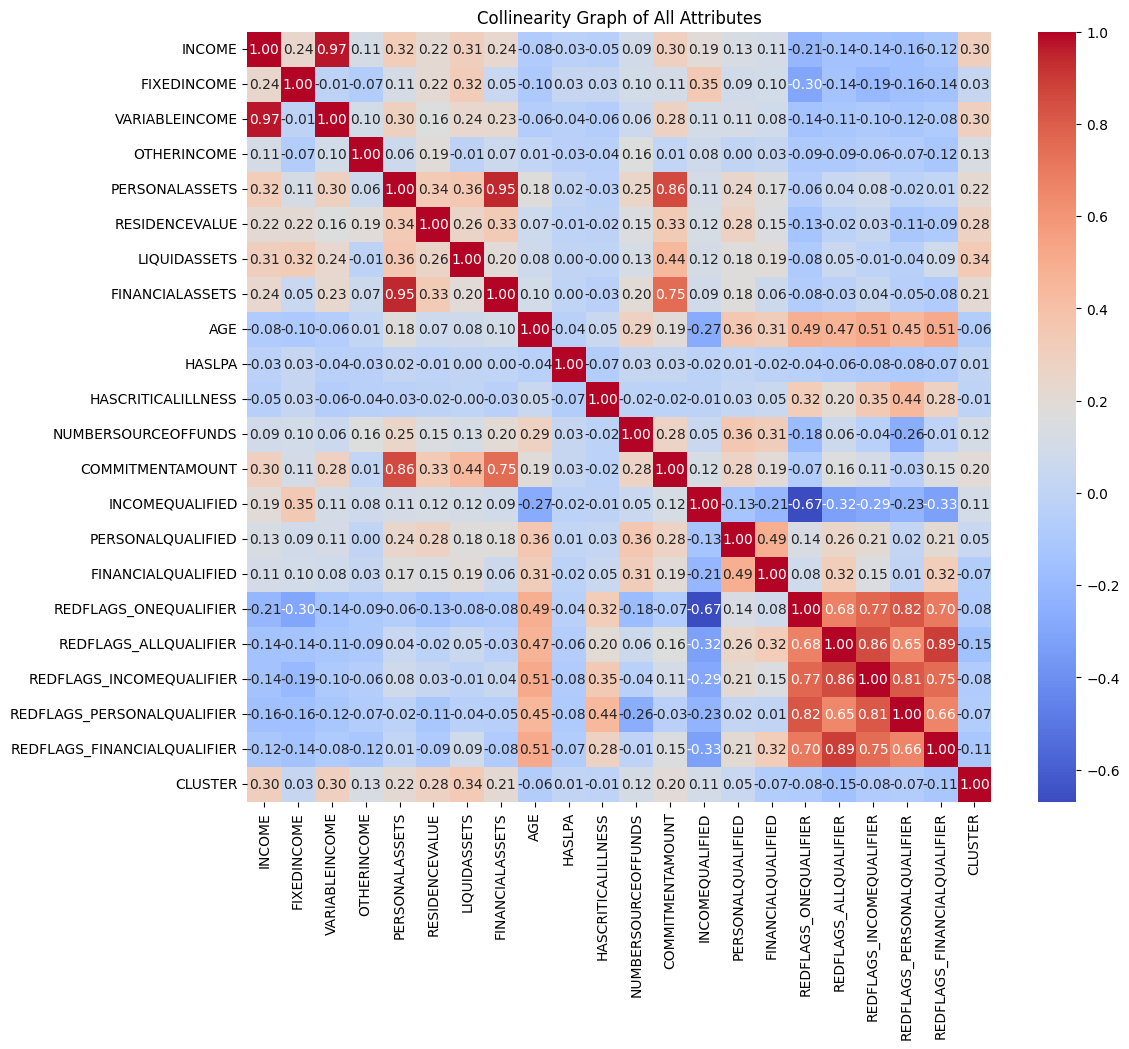

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a collinearity graph for all attributes
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Collinearity Graph of All Attributes')
plt.show()


In [9]:
reduced_df = df.copy()
reduced_df['NONFINANCIALASSETS'] = reduced_df['PERSONALASSETS'] - reduced_df['FINANCIALASSETS']
reduced_df = reduced_df.drop(columns=['INCOME', 'PERSONALASSETS'])
reduced_df 

,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,HASCRITICALILLNESS,NUMBERSOURCEOFFUNDS,...,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED,REDFLAGS_ONEQUALIFIER,REDFLAGS_ALLQUALIFIER,REDFLAGS_INCOMEQUALIFIER,REDFLAGS_PERSONALQUALIFIER,REDFLAGS_FINANCIALQUALIFIER,CLUSTER,NONFINANCIALASSETS
0,126607.201904,493648.927712,-625.588530,427180.0,652896.4,500214.0,35,0,0,3,...,1,0,1,1.0,7.0,3.0,1.0,3.0,5,871447.2
1,253214.403808,297899.298598,89369.789581,869518.0,44096.0,989404.0,34,0,0,3,...,1,0,0,1.0,3.0,2.0,1.0,0.0,5,-619411.0
2,297899.298598,14969.439754,-74.474819,551200.0,63801.4,591988.8,31,0,0,3,...,1,0,0,1.0,6.0,3.0,1.0,2.0,0,-48092.2
3,342584.193388,7596.432114,-148.949647,490568.0,8268.0,490568.0,35,0,0,2,...,1,0,0,2.0,8.0,4.0,2.0,4.0,2,333476.0
4,402164.053100,14.894965,1474.601537,757900.0,161226.0,835068.0,33,0,1,2,...,1,0,0,3.0,5.0,4.0,3.0,2.0,0,191266.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,68516.838678,53621.873748,-1489.496494,826800.0,551200.0,13599895.4,81,1,0,3,...,0,1,0,5.0,6.0,5.0,3.0,2.0,5,585650.0
453,134054.684368,-18022.907562,-1340.546846,1929200.0,113960.6,2235116.0,84,0,0,2,...,0,1,0,7.0,8.0,7.0,5.0,4.0,0,144965.6
454,151586.058088,6702.734218,744.748249,1171300.0,44647.2,2028140.4,84,0,0,2,...,0,1,0,7.0,10.0,7.0,5.0,6.0,0,219653.2
455,28896.231964,37058.672746,178.739578,1515800.0,739986.0,3553035.2,76,0,0,3,...,0,1,0,6.0,10.0,6.0,4.0,6.0,5,808886.0


In [19]:
reduced_df = reduced_df.drop(columns=['REDFLAGS_FINANCIALQUALIFIER', 'REDFLAGS_PERSONALQUALIFIER', 'REDFLAGS_INCOMEQUALIFIER'])

In [20]:
# TODO: Get price range of commitment amount for Azalea's products
commitment_amount_max = 10000000
commitment_amount_min = 100000

mean_commitment = (commitment_amount_max + commitment_amount_min) / 2
std_dev_commitment = (commitment_amount_max - commitment_amount_min) / 6  # Assuming 99.7% data within range

reduced_df['COMMITMENTAMOUNT'] = np.random.normal(loc=mean_commitment, scale=std_dev_commitment, size=len(df))
reduced_df['COMMITMENTAMOUNT'] = reduced_df['COMMITMENTAMOUNT'].clip(lower=commitment_amount_min, upper=commitment_amount_max)


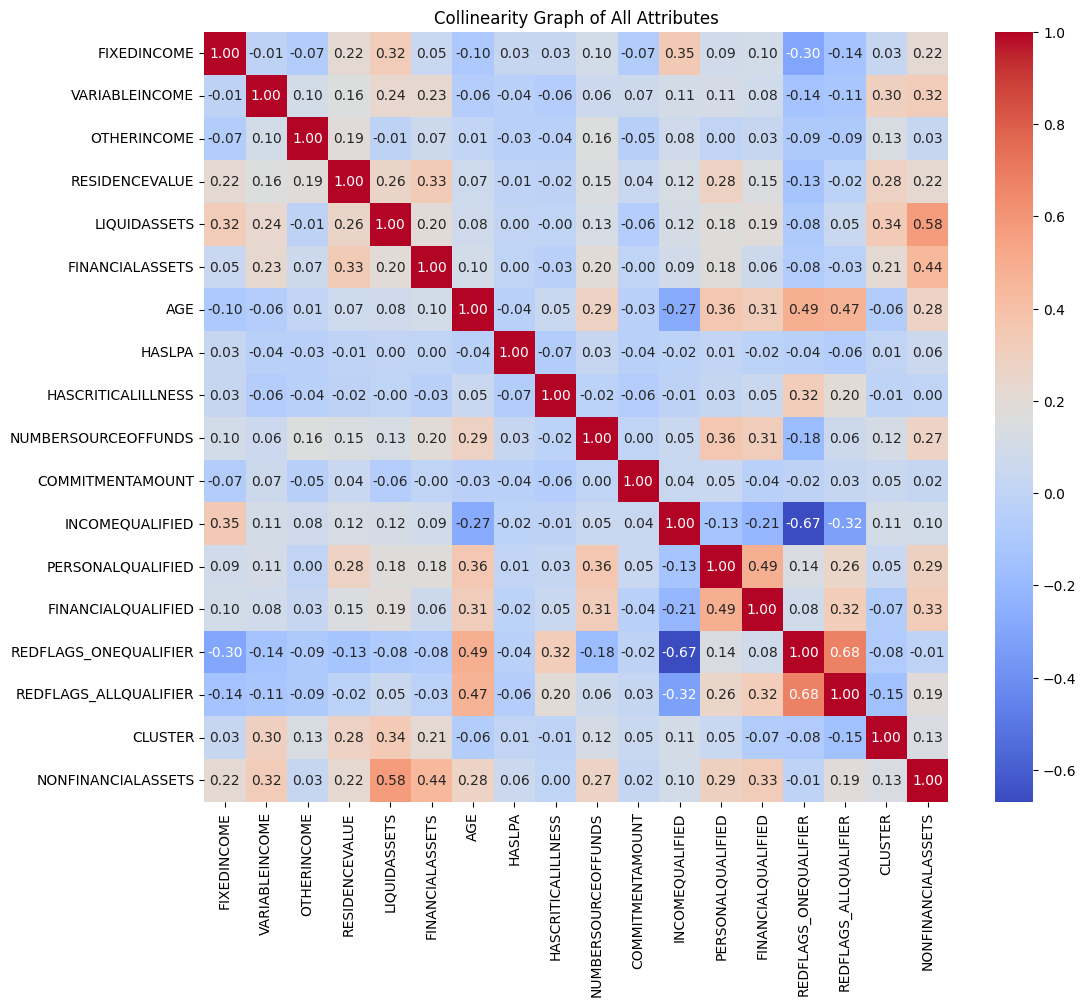

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a collinearity graph for all attributes
plt.figure(figsize=(12, 10))
correlation_matrix = reduced_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Collinearity Graph of All Attributes')
plt.show()

In [22]:
reduced_df.head()

,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,HASCRITICALILLNESS,NUMBERSOURCEOFFUNDS,COMMITMENTAMOUNT,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED,REDFLAGS_ONEQUALIFIER,REDFLAGS_ALLQUALIFIER,CLUSTER,NONFINANCIALASSETS
0,126607.201904,493648.927712,-625.588530,427180.0,652896.4,500214.0,35,0,0,3,4.389377e+06,1,0,1,1.0,7.0,5,871447.2
1,253214.403808,297899.298598,89369.789581,869518.0,44096.0,989404.0,34,0,0,3,5.889996e+06,1,0,0,1.0,3.0,5,-619411.0
2,297899.298598,14969.439754,-74.474819,551200.0,63801.4,591988.8,31,0,0,3,5.110673e+06,1,0,0,1.0,6.0,0,-48092.2
3,342584.193388,7596.432114,-148.949647,490568.0,8268.0,490568.0,35,0,0,2,8.766883e+06,1,0,0,2.0,8.0,2,333476.0
4,402164.053100,14.894965,1474.601537,757900.0,161226.0,835068.0,33,0,1,2,7.257410e+06,1,0,0,3.0,5.0,0,191266.4


                              OLS Regression Results                             
Dep. Variable:     REDFLAGS_ONEQUALIFIER   R-squared:                       0.723
Model:                               OLS   Adj. R-squared:                  0.710
Method:                    Least Squares   F-statistic:                     56.77
Date:                   Thu, 07 Nov 2024   Prob (F-statistic):           1.15e-86
Time:                           13:43:50   Log-Likelihood:                -450.59
No. Observations:                    365   AIC:                             935.2
Df Residuals:                        348   BIC:                             1001.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5124 

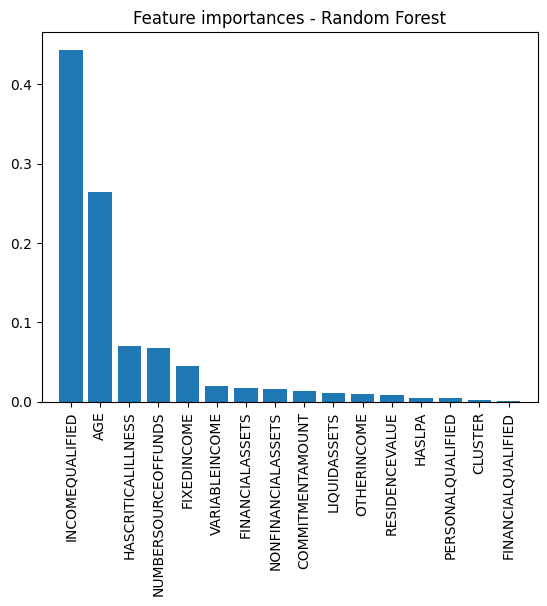

              Metric  Performance
0  R-squared (Train)     0.974353
1   R-squared (Test)     0.825705
2        MAE (Train)     0.154082
3         MAE (Test)     0.427609
4       RMSE (Train)     0.253040
5        RMSE (Test)     0.627346
Feature Importances:
INCOMEQUALIFIED: 0.7990100383758545
HASCRITICALILLNESS: 0.06608225405216217
AGE: 0.05698242038488388
NUMBERSOURCEOFFUNDS: 0.03802403435111046
PERSONALQUALIFIED: 0.009305376559495926
HASLPA: 0.007304457016289234
FIXEDINCOME: 0.004115522839128971
CLUSTER: 0.003201687941327691
VARIABLEINCOME: 0.002758434973657131
FINANCIALASSETS: 0.0026617455296218395
NONFINANCIALASSETS: 0.0024465215392410755
LIQUIDASSETS: 0.002205474302172661
COMMITMENTAMOUNT: 0.00206943741068244
RESIDENCEVALUE: 0.0017993723740801215
OTHERINCOME: 0.0012200000928714871
FINANCIALQUALIFIED: 0.0008131536887958646


/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


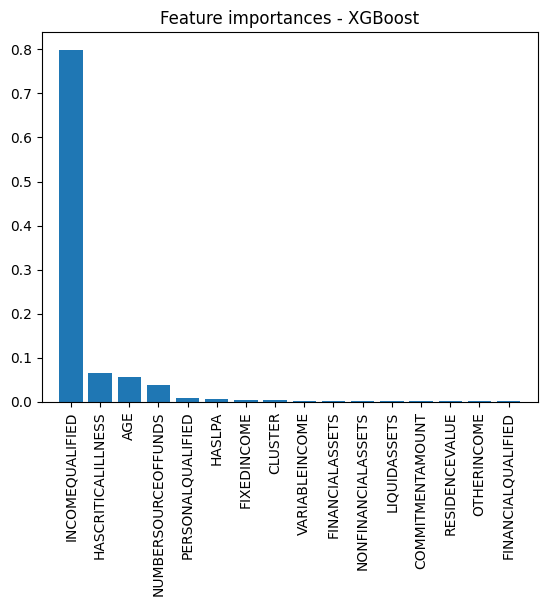

              Metric  Performance
0  R-squared (Train)     1.000000
1   R-squared (Test)     0.838370
2        MAE (Train)     0.000760
3         MAE (Test)     0.395786
4       RMSE (Train)     0.001063
5        RMSE (Test)     0.604124


In [24]:
from sample_modelling import ModelManager

result_df = reduced_df.copy()

X = reduced_df.drop(columns=['REDFLAGS_ONEQUALIFIER', 'REDFLAGS_ALLQUALIFIER'])
y = df['REDFLAGS_ONEQUALIFIER']

model_manager = ModelManager(X, y)
X_train, X_test, y_train, y_test = model_manager.run_preprocessing()

y_train, predictions_train, y_test, predictions_test = model_manager.run_regression_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['LRPREDICTION'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_randomforest_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['RFPREDICTION'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_xgboost_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['XGBPREDICTION'] = all_predictions

# y_train, predictions_train, y_test, predictions_test = model_manager.run_xgboost_model_with_tuning(X_train, X_test, y_train, y_test)
# model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

# all_predictions = np.concatenate([predictions_train, predictions_test])
# result_df['XGBTUNEDPREDICTION'] = all_predictions

In [14]:
result_df.head()

,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,HASCRITICALILLNESS,NUMBERSOURCEOFFUNDS,...,REDFLAGS_ALLQUALIFIER,REDFLAGS_INCOMEQUALIFIER,REDFLAGS_PERSONALQUALIFIER,REDFLAGS_FINANCIALQUALIFIER,CLUSTER,NONFINANCIALASSETS,LRPREDICTION,RFPREDICTION,XGBPREDICTION,XGBTUNEDPREDICTION
0,126607.201904,493648.927712,-625.588530,427180.0,652896.4,500214.0,35,0,0,3,...,7.0,3.0,1.0,3.0,5,871447.2,2.047111,2.00,2.001221,2.035849
1,253214.403808,297899.298598,89369.789581,869518.0,44096.0,989404.0,34,0,0,3,...,3.0,2.0,1.0,0.0,5,-619411.0,1.896550,2.00,1.999752,2.022250
2,297899.298598,14969.439754,-74.474819,551200.0,63801.4,591988.8,31,0,0,3,...,6.0,3.0,1.0,2.0,0,-48092.2,5.839477,5.99,6.000707,6.011837
3,342584.193388,7596.432114,-148.949647,490568.0,8268.0,490568.0,35,0,0,2,...,8.0,4.0,2.0,4.0,2,333476.0,3.554244,3.94,3.997525,3.790609
4,402164.053100,14.894965,1474.601537,757900.0,161226.0,835068.0,33,0,1,2,...,5.0,4.0,3.0,2.0,0,191266.4,-0.245834,0.00,0.000543,0.053334


                              OLS Regression Results                             
Dep. Variable:     REDFLAGS_ALLQUALIFIER   R-squared:                       0.922
Model:                               OLS   Adj. R-squared:                  0.918
Method:                    Least Squares   F-statistic:                     214.2
Date:                   Thu, 07 Nov 2024   Prob (F-statistic):          5.78e-178
Time:                           13:41:03   Log-Likelihood:                -393.45
No. Observations:                    365   AIC:                             826.9
Df Residuals:                        345   BIC:                             904.9
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3178 

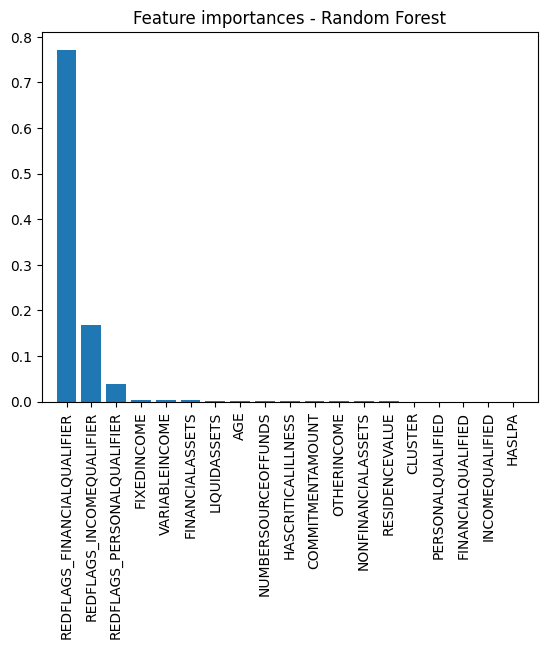

              Metric  Performance
0  R-squared (Train)     0.996714
1   R-squared (Test)     0.952372
2        MAE (Train)     0.070301
3         MAE (Test)     0.231522
4       RMSE (Train)     0.145805
5        RMSE (Test)     0.536356
Feature Importances:
REDFLAGS_FINANCIALQUALIFIER: 0.6903079748153687
REDFLAGS_INCOMEQUALIFIER: 0.2585873007774353
REDFLAGS_PERSONALQUALIFIER: 0.03157813474535942
HASCRITICALILLNESS: 0.006514761131256819
VARIABLEINCOME: 0.0036131488159298897
FIXEDINCOME: 0.0029099697712808847
FINANCIALQUALIFIED: 0.0019547317642718554
AGE: 0.0016191581962630153
NUMBERSOURCEOFFUNDS: 0.0008321679779328406
FINANCIALASSETS: 0.0007694714004173875
LIQUIDASSETS: 0.0005113408551551402
OTHERINCOME: 0.0004994201008230448
RESIDENCEVALUE: 0.00019862390763591975
INCOMEQUALIFIED: 3.517871300573461e-05
COMMITMENTAMOUNT: 2.9960869142087176e-05
NONFINANCIALASSETS: 2.95136560453102e-05
CLUSTER: 7.87866156315431e-06
PERSONALQUALIFIED: 6.386286486304016e-07
HASLPA: 5.55666190393822e-07


/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


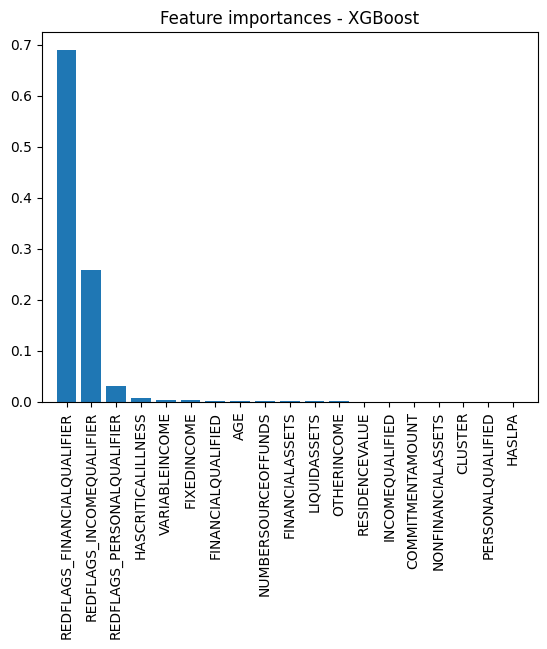

              Metric  Performance
0  R-squared (Train)     1.000000
1   R-squared (Test)     0.963076
2        MAE (Train)     0.000551
3         MAE (Test)     0.139424
4       RMSE (Train)     0.000782
5        RMSE (Test)     0.472250
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Pa

Feature Importances:
REDFLAGS_FINANCIALQUALIFIER: 0.6431710124015808
REDFLAGS_INCOMEQUALIFIER: 0.21280936896800995
REDFLAGS_PERSONALQUALIFIER: 0.09037370979785919
HASCRITICALILLNESS: 0.008701968006789684
FIXEDINCOME: 0.00831248052418232
NUMBERSOURCEOFFUNDS: 0.00630649970844388
FINANCIALASSETS: 0.00489862309768796
VARIABLEINCOME: 0.0040204767137765884
OTHERINCOME: 0.0036635787691920996
LIQUIDASSETS: 0.0025864068884402514
NONFINANCIALASSETS: 0.002421968849375844
RESIDENCEVALUE: 0.002393406815826893
CLUSTER: 0.0023727063089609146
INCOMEQUALIFIED: 0.0019673435017466545
COMMITMENTAMOUNT: 0.0019364089239388704
AGE: 0.0016872996930032969
HASLPA: 0.0009796199155971408
PERSONALQUALIFIED: 0.0009202390210703015
FINANCIALQUALIFIED: 0.0004769116931129247
              Metric  Performance
0  R-squared (Train)     0.999071
1   R-squared (Test)     0.970446
2        MAE (Train)     0.051452
3         MAE (Test)     0.217877
4       RMSE (Train)     0.077522
5        RMSE (Test)     0.422500


/Users/joesurf/Dreams/5 University/BT4103/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
from sample_modelling import ModelManager

X = reduced_df.drop(columns=['REDFLAGS_ONEQUALIFIER', 'REDFLAGS_ALLQUALIFIER'])
y = df['REDFLAGS_ALLQUALIFIER']

model_manager = ModelManager(X, y)
X_train, X_test, y_train, y_test = model_manager.run_preprocessing()

y_train, predictions_train, y_test, predictions_test = model_manager.run_regression_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['LRPREDICTION_AQ'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_randomforest_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['RFPREDICTION_AQ'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_xgboost_model(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['XGBPREDICTION_AQ'] = all_predictions

y_train, predictions_train, y_test, predictions_test = model_manager.run_xgboost_model_with_tuning(X_train, X_test, y_train, y_test)
model_manager.evaluate_model(y_train, predictions_train, y_test, predictions_test)

all_predictions = np.concatenate([predictions_train, predictions_test])
result_df['XGBTUNEDPREDICTION_AQ'] = all_predictions

In [16]:
result_df.head()

,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,HASCRITICALILLNESS,NUMBERSOURCEOFFUNDS,...,CLUSTER,NONFINANCIALASSETS,LRPREDICTION,RFPREDICTION,XGBPREDICTION,XGBTUNEDPREDICTION,LRPREDICTION_AQ,RFPREDICTION_AQ,XGBPREDICTION_AQ,XGBTUNEDPREDICTION_AQ
0,126607.201904,493648.927712,-625.588530,427180.0,652896.4,500214.0,35,0,0,3,...,5,871447.2,2.047111,2.00,2.001221,2.035849,7.447561,6.97,6.999330,6.944108
1,253214.403808,297899.298598,89369.789581,869518.0,44096.0,989404.0,34,0,0,3,...,5,-619411.0,1.896550,2.00,1.999752,2.022250,8.549762,8.00,7.999950,7.963712
2,297899.298598,14969.439754,-74.474819,551200.0,63801.4,591988.8,31,0,0,3,...,0,-48092.2,5.839477,5.99,6.000707,6.011837,10.427316,10.03,10.000200,9.974419
3,342584.193388,7596.432114,-148.949647,490568.0,8268.0,490568.0,35,0,0,2,...,2,333476.0,3.554244,3.94,3.997525,3.790609,8.356909,8.00,7.999770,8.008097
4,402164.053100,14.894965,1474.601537,757900.0,161226.0,835068.0,33,0,1,2,...,0,191266.4,-0.245834,0.00,0.000543,0.053334,1.220741,0.02,0.000938,0.209683


In [17]:
result_df.to_csv('../sample_data/result_predictions.csv', index=False)

In [18]:
# TODO: correlation test? CHI2 test?